In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import plot_tree

<h3>Import and Process Data</h3>

In this module, we use the Breast Cancer data

- Input features include Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses
- Target: binary target, whether the clump is malignant (1) or benign (0)

This data is very clean and thus does not need any preprocessing besides train/test splitting

In [3]:
bc = pd.read_csv('breast-cancer.csv')
bc.head()

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(bc, bc['Class']):
    strat_train_set = bc.iloc[train_index]
    strat_test_set = bc.iloc[test_index]
    
trainX = strat_train_set.iloc[:,1:-1]
trainY = strat_train_set.iloc[:,-1]
testX = strat_test_set.iloc[:,1:-1]
testY = strat_test_set.iloc[:,-1]

<h3> Different Decision Trees </h3>

<h4>Decision Tree 1</h4>

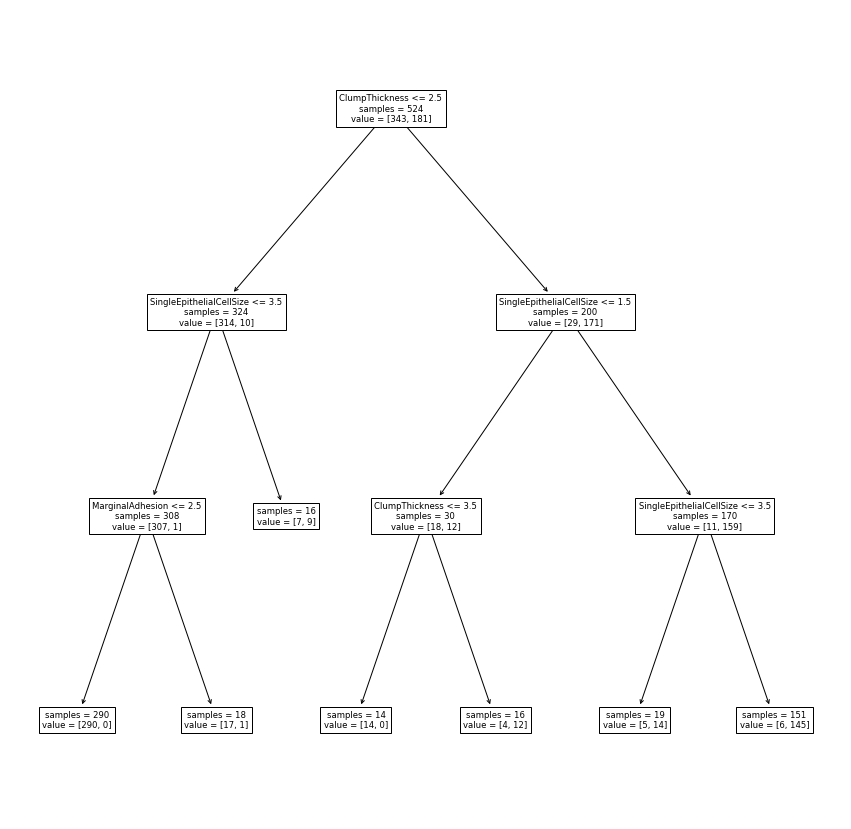

Training Accuracy: 0.9561068702290076
Testing Accuracy: 0.92


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=10)

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(15,15))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

<h4>Decision Tree 2</h4>

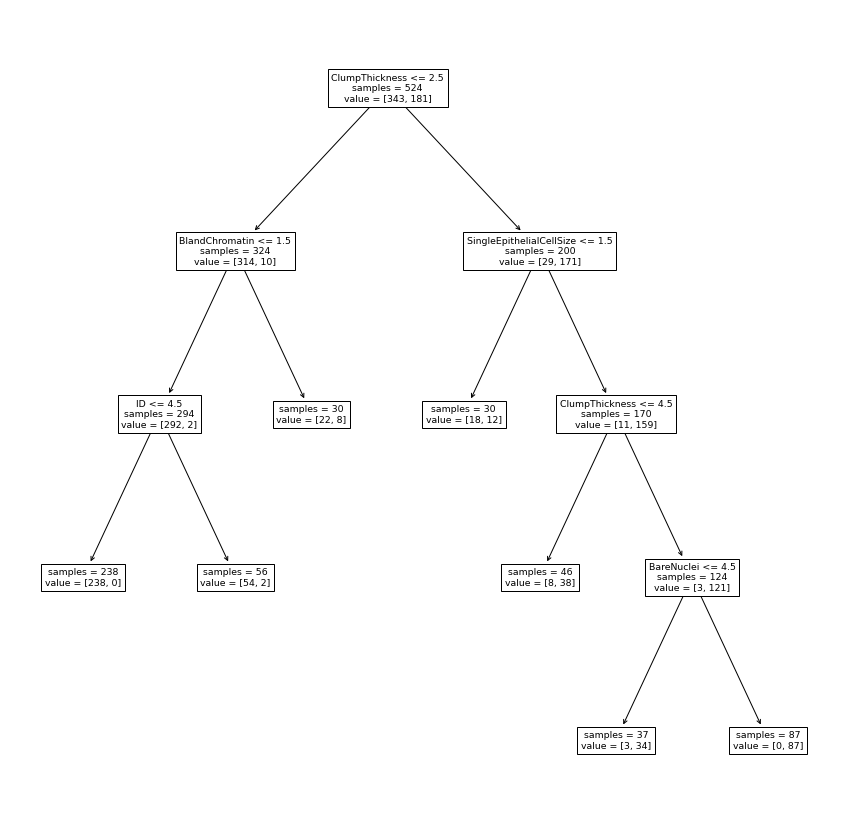

Training Accuracy: 0.9370229007633588
Testing Accuracy: 0.9314285714285714


In [18]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=30, min_samples_leaf=30)

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(15,15))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

<h4>Decision Tree 3</h4>

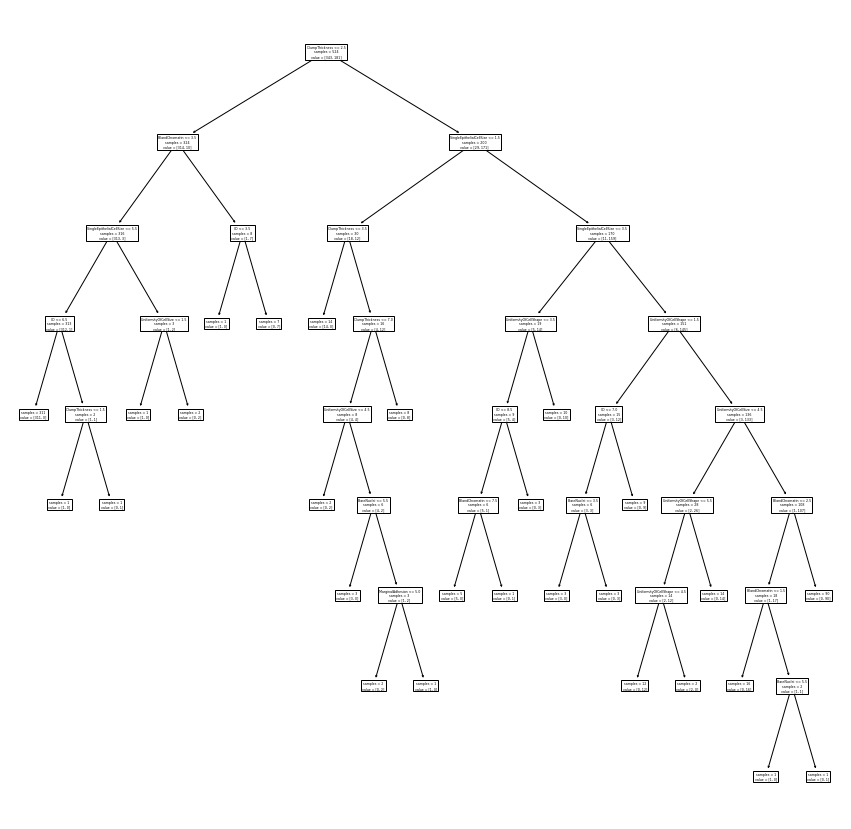

Training Accuracy: 1.0
Testing Accuracy: 0.9314285714285714


In [19]:
dt = DecisionTreeClassifier()

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(15,15))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

<h4>Decision Tree 4</h4>

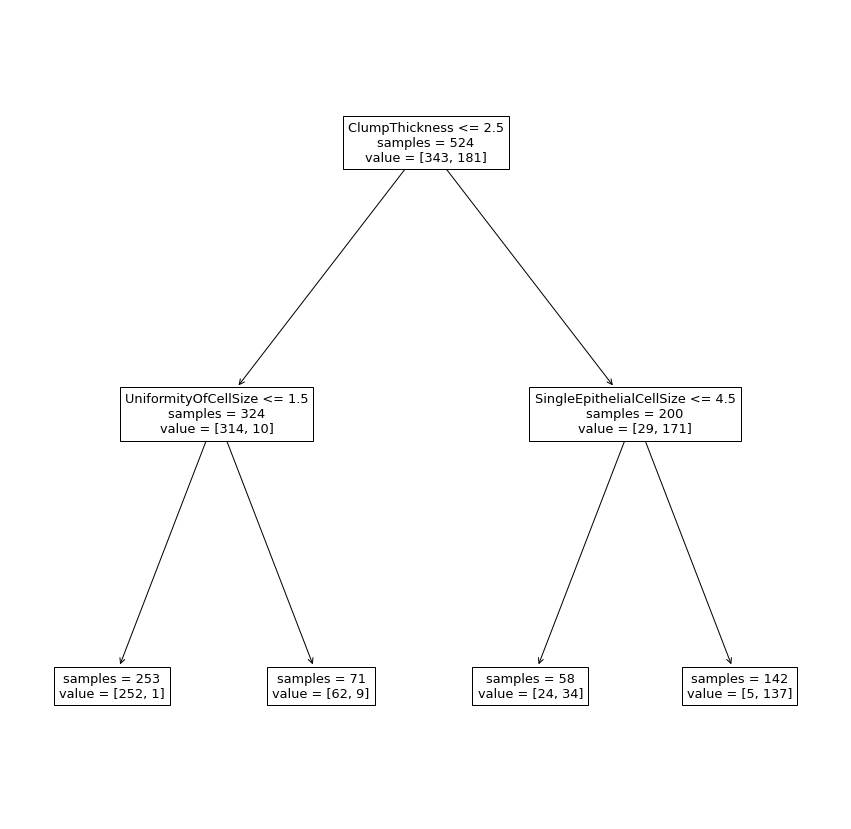

Training Accuracy: 0.9255725190839694
Testing Accuracy: 0.92


In [21]:
dt = DecisionTreeClassifier(max_depth=2, min_samples_split=50, min_samples_leaf=50)

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(15,15))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

<h4>Failed Tree</h4>

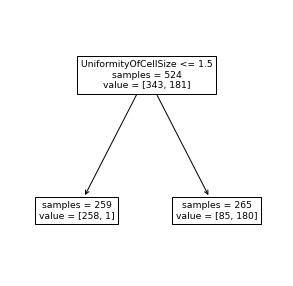

Training Accuracy: 0.8358778625954199
Testing Accuracy: 0.8685714285714285


In [30]:
dt = DecisionTreeClassifier(max_depth=1, min_samples_split=250, min_samples_leaf=250)

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(5,5))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

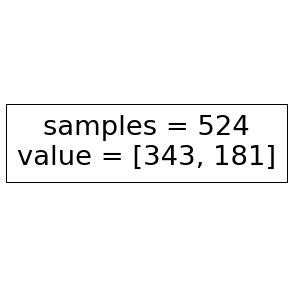

Training Accuracy: 0.6545801526717557
Testing Accuracy: 0.6571428571428571


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=1, min_samples_split=300, min_samples_leaf=300)

dt.fit(trainX, trainY)

train_accuracy_dt = dt.score(trainX, trainY)

#get testing accuracy
test_accuracy_dt = dt.score(testX, testY)

_, ax = plt.subplots(figsize=(5,5))
plot_tree(dt, feature_names=bc.columns, impurity=False)  
plt.show()

print('Training Accuracy:', train_accuracy_dt)
print('Testing Accuracy:', test_accuracy_dt)

<h3> Model Tuning with Grid Search and Cross Validation </h3>

<h4> Logistic Regression </h4>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

#hyperparameter grid for logistic regression, we only optimize regularization term C
param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

#create new model
logistic = LogisticRegression(max_iter=5000)

#perform grid search with 5-fold cross validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                50, 100]}],
             return_train_score=True, scoring='accuracy')

Let's look at the best model

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.1}
0.9713553113553115


And apply it on the testing data

In [38]:
best_l2_logistic = grid_search.best_estimator_

best_l2_logistic.score(testX, testY)

0.96

<h4> Support Vector Machine </h4>

In [39]:
from sklearn.svm import SVC

svc = SVC()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['poly','rbf'],
    'coef0' : [-1, -0.1, 0, 0.1, 1],
    'degree' : [2, 3],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'coef0': [-1, -0.1, 0, 0.1, 1], 'degree': [2, 3],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['poly', 'rbf']}],
             return_train_score=True, scoring='accuracy')

Let's check the best model

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'coef0': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
0.9752014652014651


And test it on testing data

In [42]:
best_svc = grid_search.best_estimator_
best_svc.score(testX, testY)

0.96

<h4> Decision Tree </h4>

In [50]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{
    'max_depth': [3,4,5,6,7],
    'max_features' : [3, 5, 7],
    'min_samples_split' : [10, 20, 30, 40],
    'min_samples_leaf' : [10, 20, 30, 40]
}]

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6, 7],
                          'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30, 40],
                          'min_samples_split': [10, 20, 30, 40]}],
             return_train_score=True, scoring='accuracy')

In [51]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 40}
0.9522527472527471


In [52]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.8971428571428571

<h4>Random Forest</h4>

In [53]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3, 4, 5, 6],
    'max_features' : [3, 5, 7],
    'min_samples_split' : [10, 20, 30, 40],
    'min_samples_leaf' : [10, 20, 30, 40]
}]

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX,trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30, 40],
                          'min_samples_split': [10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='accuracy')

Best training model:

In [54]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 30, 'min_samples_split': 40, 'n_estimators': 20}
0.9752014652014651


In [56]:
best_dt = grid_search.best_estimator_
best_dt.score(testX, testY)

0.9485714285714286

<h3> Model Tuning for AWS XGBoost </h3>

<h4> Setting up Environment </h4>

In [4]:
import sagemaker
import boto3

import numpy as np                                # For performing matrix operations and numerical processing
from time import gmtime, strftime
import os

region = boto3.Session().region_name
smclient = boto3.Session().client('sagemaker')

from sagemaker import get_execution_role

role = get_execution_role()
print(role)

sess = sagemaker.Session()
bucket = sess.default_bucket()                    # Set a default S3 bucket
prefix = 'DEMO-automatic-model-tuning-xgboost-dm'

arn:aws:iam::055003053546:role/service-role/AmazonSageMaker-ExecutionRole-20220213T111622


<h4>Preparing Data for XGBoost </h4>

In [5]:
from sklearn.model_selection import train_test_split

#further split training data to training and validation
trainX, validX, trainY, validY = train_test_split(trainX,trainY,test_size=0.3)

In [10]:
traindata = pd.concat([trainY,trainX],axis=1)
validdata = pd.concat([validY,validX],axis=1)
traindata.to_csv('train.csv', index=False, header=False)
validdata.to_csv('validation.csv', index=False, header=False)

In [11]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

<h4>Launch a Model Tuning Job</h4>

<h5>Define Hyperparamter Grid</h5>

In [12]:
tuning_job_config = {
    "ParameterRanges": {
      "CategoricalParameterRanges": [],
      "ContinuousParameterRanges": [
        {
          "MaxValue": "1",
          "MinValue": "0",
          "Name": "eta"
        },
        {
          "MaxValue": "2",
          "MinValue": "0",
          "Name": "alpha"
        },
        {
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "min_child_weight"
        }
      ],
      "IntegerParameterRanges": [
        {
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "max_depth"
        }
      ]
    },
    "ResourceLimits": {
      "MaxNumberOfTrainingJobs": 20,
      "MaxParallelTrainingJobs": 3
    },
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {
      "MetricName": "validation:auc",
      "Type": "Maximize"
    }
  }

<h5>Define Training Job</h5>

In [15]:
from sagemaker.amazon.amazon_estimator import get_image_uri
training_image = get_image_uri(region, 'xgboost', repo_version='1.0-1')

s3_input_train = 's3://{}/{}/train'.format(bucket, prefix)
s3_input_validation ='s3://{}/{}/validation/'.format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {
      "TrainingImage": training_image,
      "TrainingInputMode": "File"
    },
    "InputDataConfig": [
      {
        "ChannelName": "train",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_train
          }
        }
      },
      {
        "ChannelName": "validation",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_validation
          }
        }
      }
    ],
    "OutputDataConfig": {
      "S3OutputPath": "s3://{}/{}/output".format(bucket,prefix)
    },
    "ResourceConfig": {
      "InstanceCount": 1,
      "InstanceType": "ml.c4.2xlarge",
      "VolumeSizeInGB": 10
    },
    "RoleArn": role,
    "StaticHyperParameters": {
      "eval_metric": "auc",
      "num_round": "100",
      "objective": "binary:logistic",
      "rate_drop": "0.3",
      "tweedie_variance_power": "1.4"
    },
    "StoppingCondition": {
      "MaxRuntimeInSeconds": 43200
    }
}

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


<h5>Name and Launch Tuning Job</h5>

In [16]:
tuning_job_name = "MyTuningJob"
smclient.create_hyper_parameter_tuning_job(HyperParameterTuningJobName = tuning_job_name,
                                           HyperParameterTuningJobConfig = tuning_job_config,
                                           TrainingJobDefinition = training_job_definition)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:055003053546:hyper-parameter-tuning-job/mytuningjob',
 'ResponseMetadata': {'RequestId': '5fd2a8f8-5d41-4c9b-b220-7b8eebcc7d91',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5fd2a8f8-5d41-4c9b-b220-7b8eebcc7d91',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '112',
   'date': 'Wed, 23 Feb 2022 17:30:53 GMT'},
  'RetryAttempts': 0}}

Monitor the tuning job: https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-monitor.html

The tuning job can be seen in <b>Hyperparameter tuning jobs</b>:

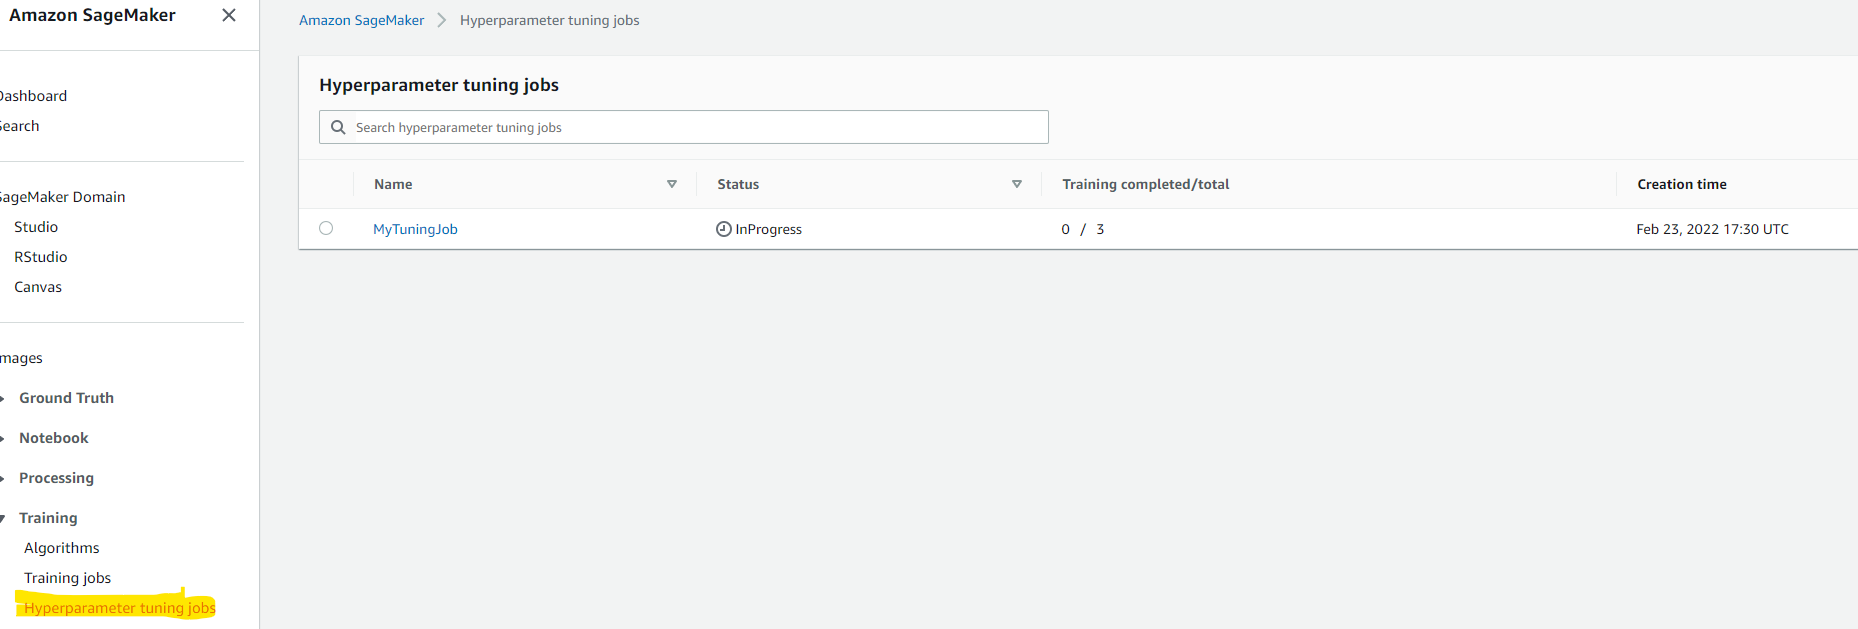

After the job finishes, you can select it to view the details

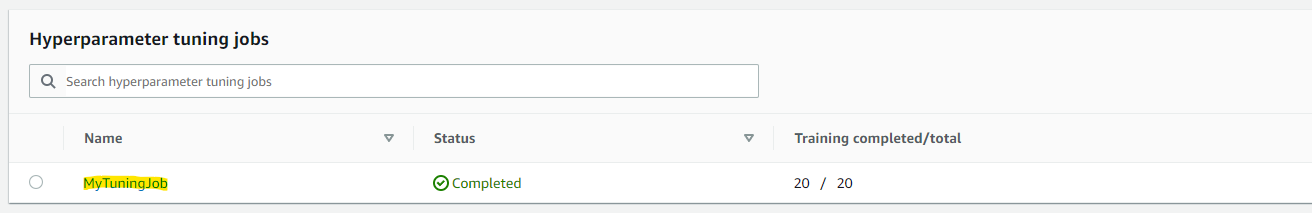

Click on <b>Create Model</b> to deploy
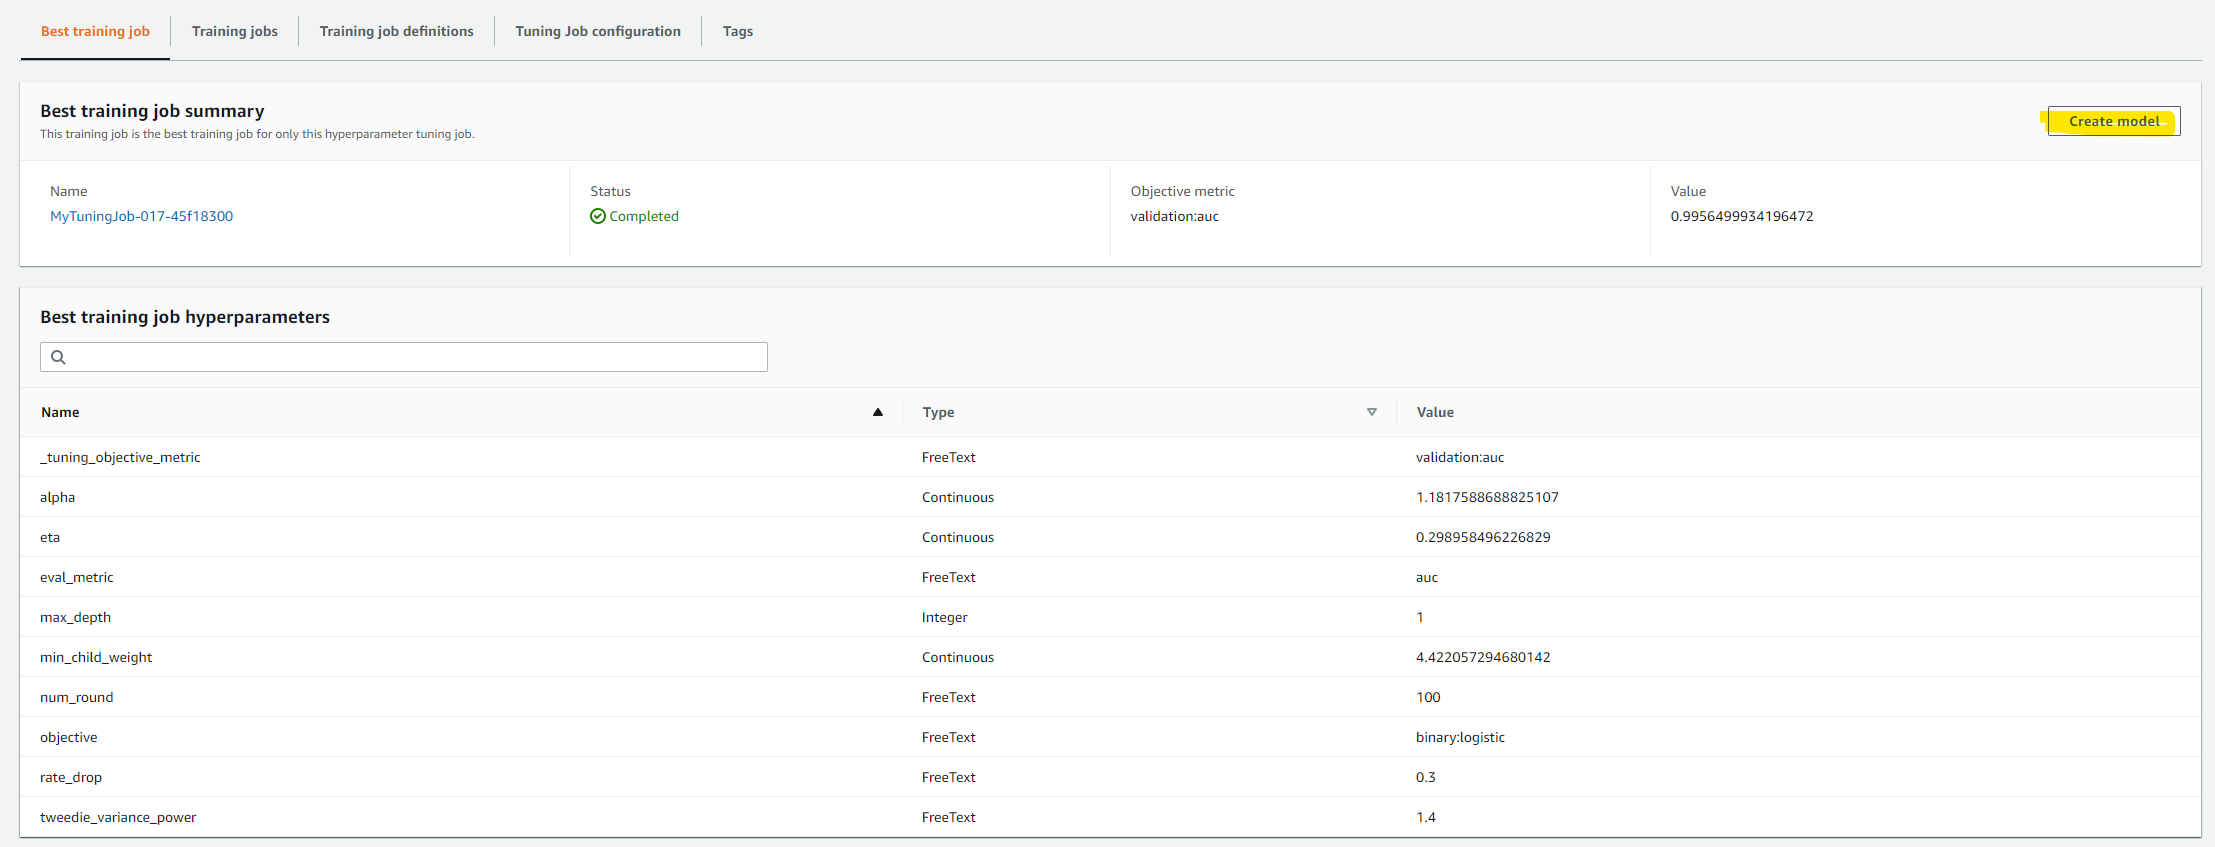

Name your model. I will name it <b>xgboost-bc</b>. You can then click on the model to view it and create end point to make prediction

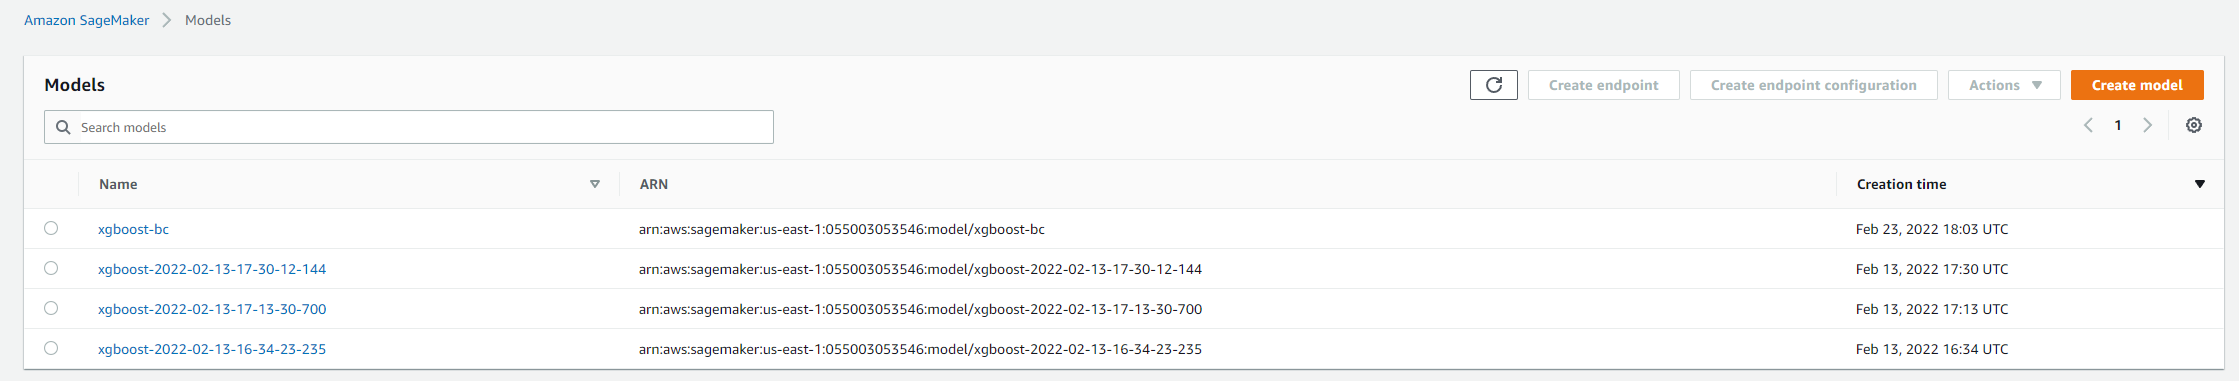

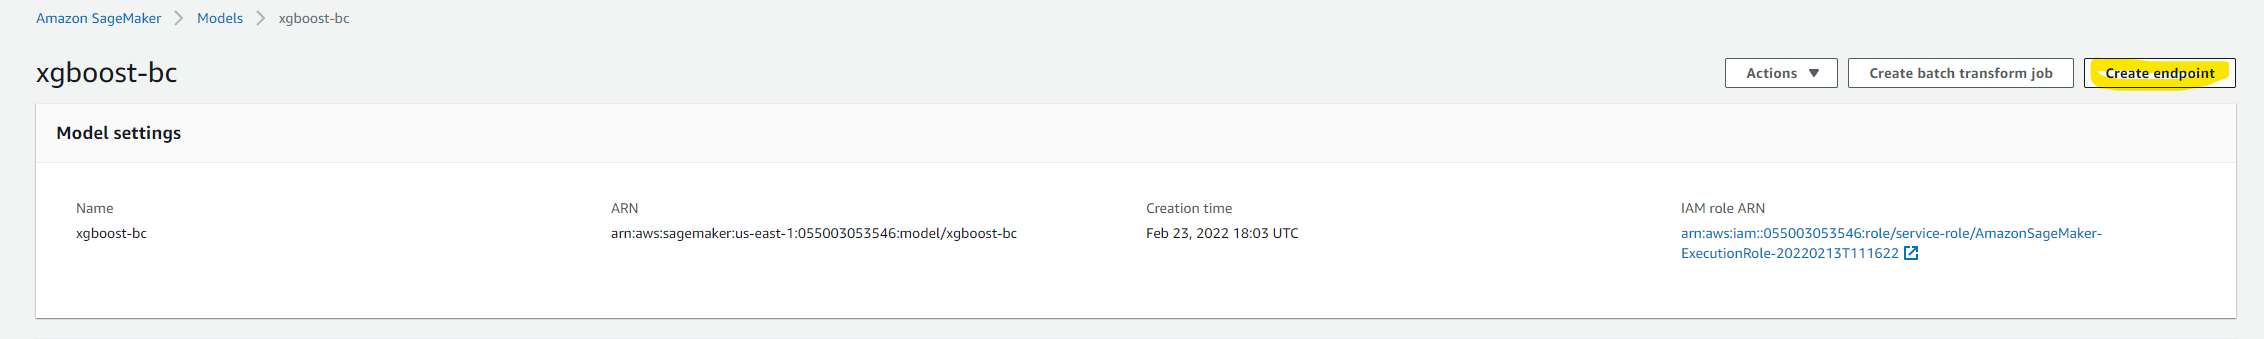

Provide the required information

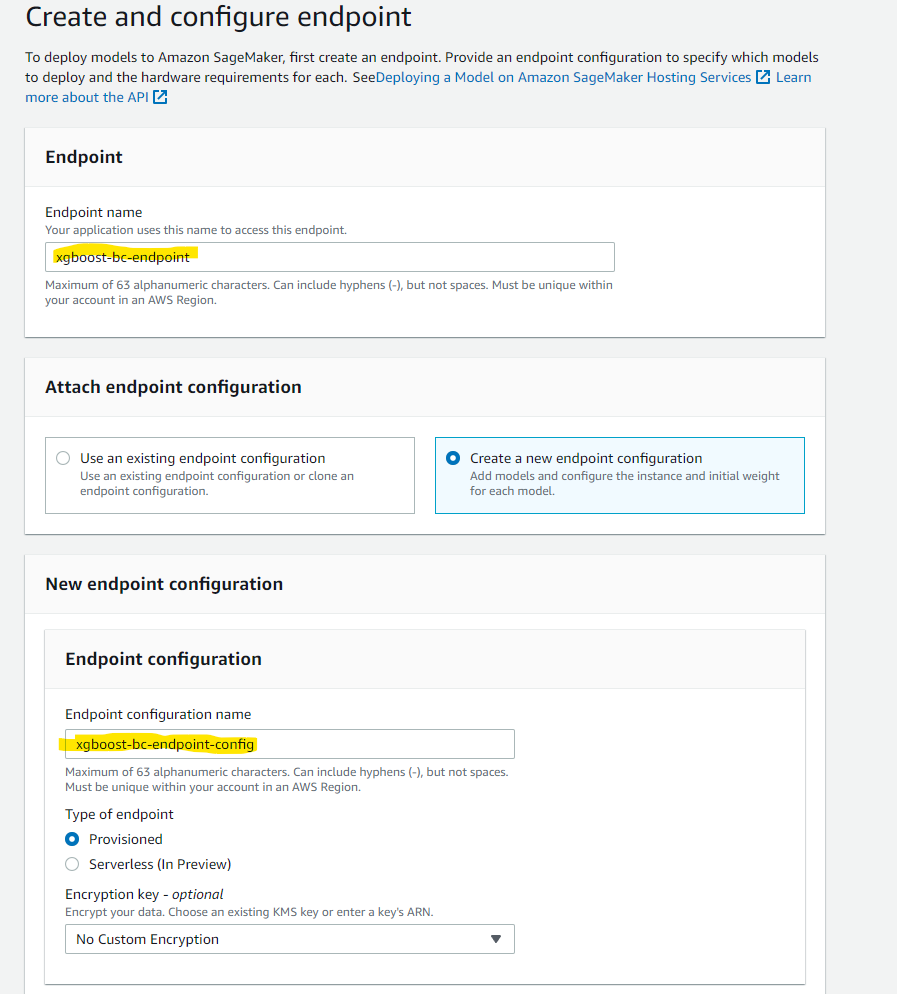

<h4>Import the Best Model to Make Predictions</h4>

In [32]:
from sagemaker.serializers import CSVSerializer
from sagemaker.predictor import Predictor

best_xgboost = Predictor('xgboost-bc-endpoint')      #the endpoint name you created goes here
best_xgboost.serializer = CSVSerializer()
predictions = best_xgboost.predict(testX.values).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array

(175,)


In [34]:
cm = pd.crosstab(index=testY.values.flatten(), columns=np.round(predictions_array), rownames=['Observed'], colnames=['Predicted'])
tn = cm.iloc[0,0]; fn = cm.iloc[1,0]; tp = cm.iloc[1,1]; fp = cm.iloc[0,1]; p = (tp+tn)/(tp+tn+fp+fn)*100
print("\n{0:<20}{1:<4.1f}%\n".format("Overall Classification Rate: ", p))
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "Not Approved", "Approved"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No Purchase", tn/(tn+fn)*100,tn, fp/(tp+fp)*100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("Purchase", fn/(tn+fn)*100,fn, tp/(tp+fp)*100, tp))


Overall Classification Rate: 94.9%

Predicted      Not Approved   Approved
Observed
No Purchase    95% (112)     5% (3)
Purchase        5% (6)     95% (54) 



<h4>Cleaning up</h4>

In [38]:
best_xgboost.delete_endpoint(delete_endpoint_config=True)
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

[{'ResponseMetadata': {'RequestId': '1DTD0B7BCMTBMQN0',
   'HostId': 'iqueNTf/khjsONyVKlj95v3GbQl/qK/9yGkhsM1ygcC3TBTPpwmPBv+48yIDWRKZ3vxRYAX/B+A=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': 'iqueNTf/khjsONyVKlj95v3GbQl/qK/9yGkhsM1ygcC3TBTPpwmPBv+48yIDWRKZ3vxRYAX/B+A=',
    'x-amz-request-id': '1DTD0B7BCMTBMQN0',
    'date': 'Wed, 23 Feb 2022 18:51:55 GMT',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3',
    'connection': 'close'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/MyTuningJob-011-139c4bbe/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/MyTuningJob-002-a73be287/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/MyTuningJob-010-b325a9b3/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/MyTuningJob-018-9c3a2d13/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tu